# Impoting the Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DS_FINAL.xlsx to DS_FINAL (3).xlsx


In [ ]:
df=pd.read_excel("DS_FINAL.xlsx")

Checking the Shape of the Dataset

In [ ]:
df.shape

(1106, 20)

Check for the Statistical Analysis.
For Numerical Data as well as Categaorical Data.

In [ ]:
df.describe(include="O")

,Employee Name,Employee Position,People Group,Employee Category,Supervisor name,Current Status,Termination Date,Utilization%,Fiscal Year,Status
count,1106,1106,1106,1106,1106,1106,279,1106,1106,1106
unique,1106,13,2,12,151,5,27,998,2,2
top,Trisha Edi,7,Client Service Staff,Confirmed Staff,Hedi Elna,Active,2017-09-30 00:00:00,0,2017-18,NP
freq,1,357,1096,677,20,798,21,51,971,946


In [ ]:
df.describe()

,Employee No,Employee LOC,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1105.000000
mean,556.377034,4.036166,1554.083183,1353.832794,1033.169367,174.045208,26.937550,59.872966,333.531538
std,320.788401,2.782387,676.986931,603.135443,649.760598,161.191288,28.755204,247.488902,381.204494
min,1.000000,1.000000,0.000000,-40.000000,-42.000000,0.000000,0.000000,0.000000,-8.000000
25%,279.250000,1.000000,1000.000000,857.250000,444.250000,80.000000,4.000000,0.000000,64.000000
50%,557.500000,3.000000,2040.000000,1682.750000,1116.750000,168.000000,20.000000,0.000000,208.000000
75%,833.750000,7.000000,2080.000000,1823.125000,1601.500000,240.000000,39.000000,0.000000,451.000000
max,1111.000000,9.000000,2088.000000,2080.000000,2669.000000,2080.000000,150.000000,2015.000000,2257.000000


###Feature Encoding on categorical variable

Check the Target Variable Columns and converted it to proper data "Resigned"  to 0 and other remaining category to 1.

Replace the Current Status Value in 0 and 1

In [ ]:
df['Current Status'] = df['Current Status'].replace(['Active','New Joiner','Secondment','Sabbatical'],1)

In [ ]:
df['Current Status'] = df['Current Status'].replace('Resigned',0)

In [ ]:
df['Current Status'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       0
3       0
4       0
       ..
1101    0
1102    1
1103    1
1104    0
1105    1
Name: Current Status, Length: 1106, dtype: int64>

In [ ]:
df['Employee Category'] = df['Employee Category'].replace(['Confirmed Staff','Secondee-Outward-Without Pay','Fixed term Staff','SVP/VP','Confirmed-Sabbatical','Level 1/2','Confirmed Staff (Part-Time 4 Hours)','Confirmed Staff (Part-Time 6 Hours)'],1)
df['Employee Category'] = df['Employee Category'].replace(['Resigned'],0)
df['Employee Category'] = df['Employee Category'].replace(['Serving Notice Period','Staff on Probation','Awaiting Termination'],2)

In [ ]:
df['People Group'] = df['People Group'].replace(['Client Service Staff'],1)
df['People Group'] = df['People Group'].replace(['Support Staff'],0)

Drop the Columns from 2016 March to 2018 March
Total Hours.12	Total Available Hours.12	Work Hours.12	Leave Hours.12	Training Hours.12	BD Hours.12	NC Hours.12

And Kept the Total Available Hours, Total Work Hours, Total Leave Hours,Total Training Hours,	Total BD Hours,	Total NC Hours

# Created New Dataset For Processing and Cleaning

In [ ]:
HRdf = df.drop(['Employee No','Employee Name','Supervisor name','Fiscal Year','Status'], axis = 1)

In [ ]:
HRdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee Position      1106 non-null   object        
 1   Employee LOC           1106 non-null   int64         
 2   People Group           1106 non-null   int64         
 3   Employee Category      1106 non-null   int64         
 4   Join Date              1106 non-null   datetime64[ns]
 5   Current Status         1106 non-null   int64         
 6   Termination Date       279 non-null    object        
 7   Total Hours            1106 non-null   int64         
 8   Total Available Hours  1106 non-null   float64       
 9   Work Hours             1106 non-null   float64       
 10  Leave Hours            1106 non-null   int64         
 11  Training Hours         1106 non-null   float64       
 12  BD Hours               1106 non-null   float64       
 13  NC 

Check for the Datatype and Summary of the Data

# Exploratory Data Analysis

In [ ]:
import seaborn as sns

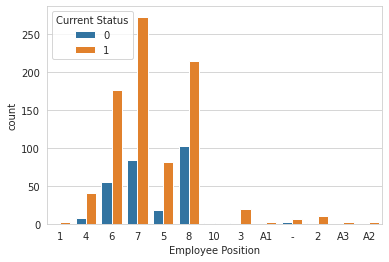

In [ ]:
sns.countplot(x=HRdf['Employee Position'],hue=HRdf['Current Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


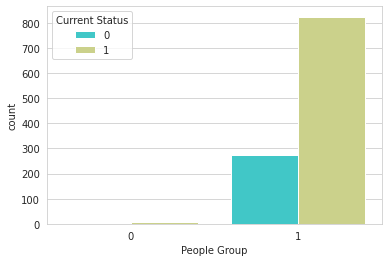

In [ ]:
sns.countplot(HRdf['People Group'],hue=HRdf['Current Status'],palette='rainbow')

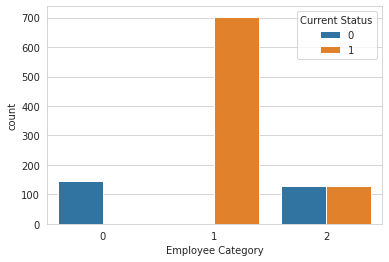

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=HRdf['Employee Category'],hue=HRdf['Current Status'])

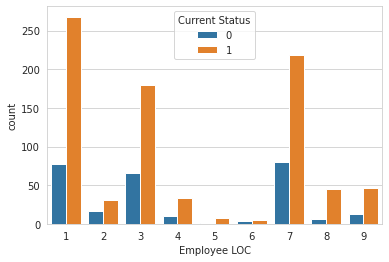

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=HRdf['Employee LOC'],hue=HRdf['Current Status'])

In [ ]:
!pip install pyspark

In [ ]:
A = [1,1,1,3,3,4,3,2,4,2]
def solution(nums):
  return (all(nums[i] <= nums[i + 1] for i in range(len(nums) - 1)) or
all(nums[i] >= nums[i + 1] for i in range(len(nums) - 1)))

print(solution(A))

False


###Removed Punctuation marks(',' , '_' , 'A1','A2','A3') from numeric column that are working hours columns of emoployee.

In [ ]:
HRdf['Total Available Hours'] = HRdf['Total Available Hours'].astype(str).replace(',', '')
HRdf['Total Hours'] = HRdf['Total Hours'].astype(str).replace(',','')
HRdf['Leave Hours'] = HRdf['Leave Hours'].astype(str).replace(',','')
HRdf['BD Hours'] = HRdf['BD Hours'].astype(str).replace(',','')
HRdf['NC Hours'] = HRdf['NC Hours'].astype(str).replace(',','')
HRdf['Work Hours'] = HRdf['Work Hours'].astype(str).replace(',','')
HRdf['Utilization%'] = HRdf['Utilization%'].astype(str).replace('-',0)
HRdf['Employee Position'] = HRdf['Employee Position'].astype(str).replace('-','0')
HRdf['Employee Position'] = HRdf['Employee Position'].astype(str).replace('A1','11')
HRdf['Employee Position'] = HRdf['Employee Position'].astype(str).replace('A2','12')
HRdf['Employee Position'] = HRdf['Employee Position'].astype(str).replace('A3','13')

####Convert datatype into float

In [ ]:
HRdf['Total Available Hours'] = HRdf['Total Available Hours'].astype(float)
HRdf['Total Hours'] = HRdf['Total Hours'].astype(float)
HRdf['Leave Hours'] = HRdf['Leave Hours'].astype(float)
HRdf['BD Hours'] = HRdf['BD Hours'].astype(float)
HRdf['NC Hours'] = HRdf['NC Hours'].astype(float)
HRdf['Work Hours'] = HRdf['Work Hours'].astype(float)
HRdf['Utilization%'] = HRdf['Utilization%'].astype(float)
HRdf['Employee Position'] = HRdf['Employee Position'].astype(int)

In [ ]:

HRdf['Join_Month'] = pd.to_datetime(HRdf['Join Date'],format='%d/%m/%Y').dt.month
HRdf['Join_Year'] = pd.to_datetime(HRdf['Join Date'],format='%d/%m/%Y').dt.year
HRdf['Termination_Month'] = pd.to_datetime(HRdf['Termination Date'],format='%d/%m/%Y',errors = 'coerce').dt.month
HRdf['Termination_Year'] = pd.to_datetime(HRdf['Termination Date'],format='%d/%m/%Y',errors = 'coerce').dt.year

In [ ]:
HRdf['Termination_Month'].value_counts()

Series([], Name: Termination_Month, dtype: int64)

In [ ]:
HRdf['Termination_Year'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Termination_Year, dtype: float64

###Check distribution of numeric features.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


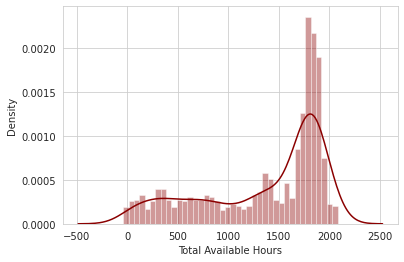

In [ ]:
sns.distplot(HRdf['Total Available Hours'],color='darkred',bins=40)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


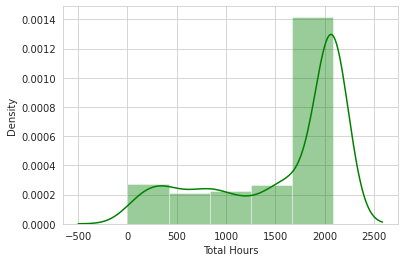

In [ ]:
sns.distplot(HRdf['Total Hours'],color='green',bins=5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


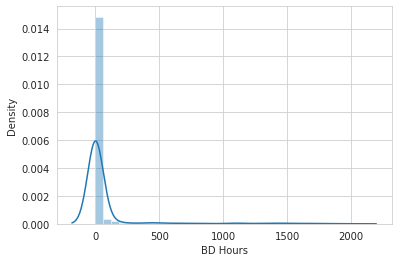

In [ ]:
sns.distplot(HRdf['BD Hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


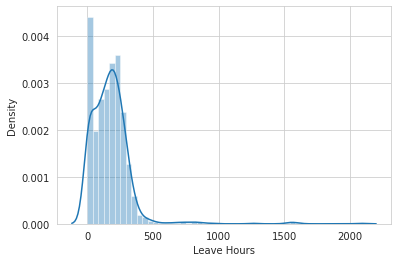

In [ ]:
sns.distplot(HRdf['Leave Hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


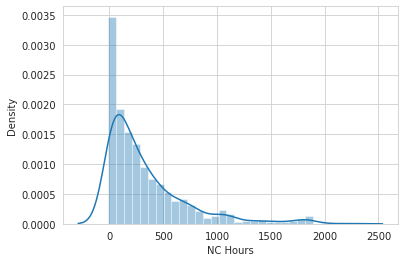

In [ ]:
sns.distplot(HRdf['NC Hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


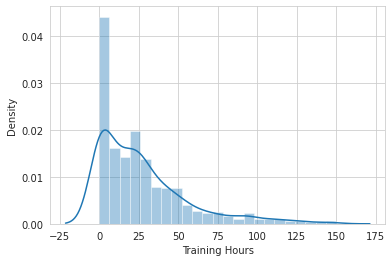

In [ ]:
sns.distplot(HRdf['Training Hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


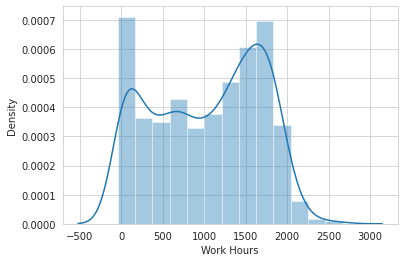

In [ ]:
sns.distplot(HRdf['Work Hours'])

In [ ]:
HRdf.head()

,Employee Position,Employee LOC,People Group,Employee Category,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Join_Month,Join_Year,Termination_Month,Termination_Year
0,1,3,1,1,1998-06-30,1,-,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.1237,6,1998,NaN,NaN
1,4,1,1,2,2004-07-31,0,2017-01-31 00:00:00,1744.0,1528.0,97.0,216.0,0.0,1264.0,192.0,0.0635,7,2004,NaN,NaN
2,4,1,1,2,2004-11-30,0,2017-01-31 00:00:00,1616.0,1528.0,720.0,88.0,0.0,0.0,888.0,0.4712,11,2004,NaN,NaN
3,4,2,1,2,2005-02-28,0,2016-08-31 00:00:00,872.0,766.0,36.0,104.0,2.0,0.0,746.0,0.0470,2,2005,NaN,NaN
4,4,7,1,2,2009-01-31,0,2016-08-31 00:00:00,848.0,768.0,688.0,80.0,0.0,0.0,80.0,0.8958,1,2009,NaN,NaN


In [ ]:
HRdf = HRdf.drop(['Join Date','Termination_Month','Termination_Year','Termination Date'],axis=1)

In [ ]:
HRdf.dtypes

Employee Position          int64
Employee LOC               int64
People Group               int64
Employee Category          int64
Current Status             int64
Total Hours              float64
Total Available Hours    float64
Work Hours               float64
Leave Hours              float64
Training Hours           float64
BD Hours                 float64
NC Hours                 float64
Utilization%             float64
Join_Month                 int64
Join_Year                  int64
dtype: object

###Checked correlation of variables using correlation or heatmap

In [ ]:
import matplotlib.pyplot as plt

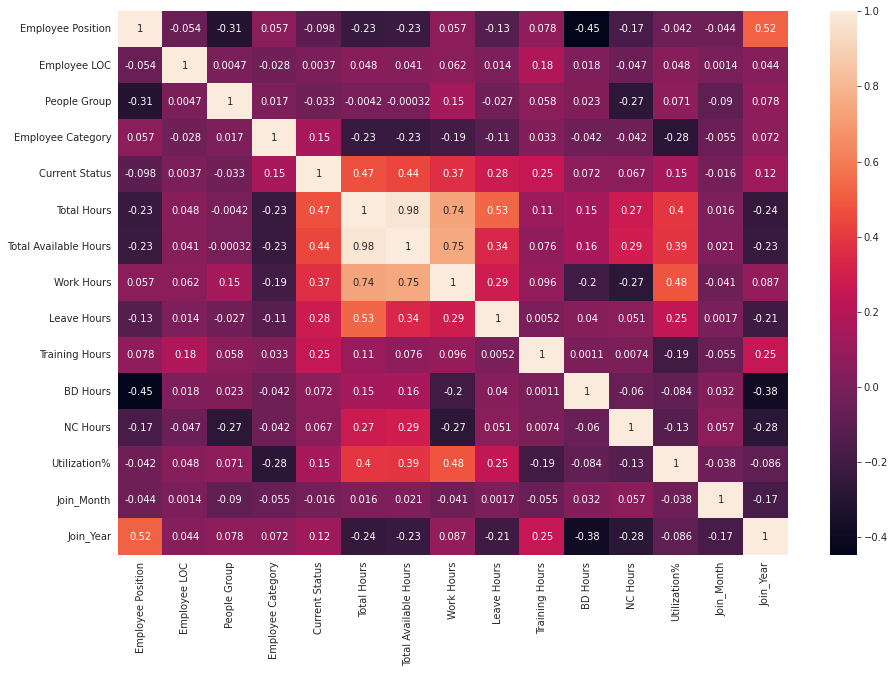

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(HRdf.corr(),annot=True)     

In [ ]:
people_group = pd.get_dummies(HRdf['People Group'],drop_first=True,prefix='People_Group')
Employee_Cat = pd.get_dummies(HRdf['Employee Category'],drop_first=True,prefix="Employee_Cat")

In [ ]:
HRdf = pd.concat([HRdf,people_group,Employee_Cat],axis=1)

In [ ]:
HRdf.head()

,Employee Position,Employee LOC,People Group,Employee Category,Current Status,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Join_Month,Join_Year,People_Group_1,Employee_Cat_1,Employee_Cat_2
0,1,3,1,1,1,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.1237,6,1998,1,1,0
1,4,1,1,2,0,1744.0,1528.0,97.0,216.0,0.0,1264.0,192.0,0.0635,7,2004,1,0,1
2,4,1,1,2,0,1616.0,1528.0,720.0,88.0,0.0,0.0,888.0,0.4712,11,2004,1,0,1
3,4,2,1,2,0,872.0,766.0,36.0,104.0,2.0,0.0,746.0,0.0470,2,2005,1,0,1
4,4,7,1,2,0,848.0,768.0,688.0,80.0,0.0,0.0,80.0,0.8958,1,2009,1,0,1


# Implementing Random Forest

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = HRdf.drop('Current Status',axis=1)
y = HRdf['Current Status']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
rs = RandomOverSampler(random_state=42)

In [ ]:
X.columns

Index(['Employee Position', 'Employee LOC', 'People Group',
       'Employee Category', 'Total Hours', 'Total Available Hours',
       'Work Hours', 'Leave Hours', 'Training Hours', 'BD Hours', 'NC Hours',
       'Utilization%', 'Join_Month', 'Join_Year', 'People_Group_1',
       'Employee_Cat_1', 'Employee_Cat_2'],
      dtype='object')

In [ ]:
X['NC Hours'] = X['NC Hours'].fillna(X['NC Hours'].mean())

In [ ]:
X.head()

,Employee Position,Employee LOC,People Group,Employee Category,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Join_Month,Join_Year,People_Group_1,Employee_Cat_1,Employee_Cat_2
0,1,3,1,1,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.1237,6,1998,1,1,0
1,4,1,1,2,1744.0,1528.0,97.0,216.0,0.0,1264.0,192.0,0.0635,7,2004,1,0,1
2,4,1,1,2,1616.0,1528.0,720.0,88.0,0.0,0.0,888.0,0.4712,11,2004,1,0,1
3,4,2,1,2,872.0,766.0,36.0,104.0,2.0,0.0,746.0,0.0470,2,2005,1,0,1
4,4,7,1,2,848.0,768.0,688.0,80.0,0.0,0.0,80.0,0.8958,1,2009,1,0,1


In [ ]:
X, y = rs.fit_resample(X,y)

In [ ]:
X.shape,y.shape

((1666, 17), (1666,))

In [ ]:
X_col = HRdf.drop('Current Status',axis=1)
y_col = HRdf['Current Status']

In [ ]:
# X = pd.DataFrame(X,columns=X_col.columns)
# y = pd.DataFrame(y,columns=y.columns)

In [ ]:
X = pd.DataFrame(scaler.fit_transform(X),columns=X_col.columns)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()

In [ ]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = RFC.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[160   0]
 [  0 174]]


In [ ]:
print(accuracy_score(y_pred,y_test))

1.0


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       174

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RFC,X,y,cv=5)

In [ ]:
print(np.mean(score))

0.9381525237812663


In [ ]:
# y_pred = pd.DataFrame(y_pred)

In [ ]:
# y_pred.value_counts()

# Implementing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred= logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test,pred)

In [ ]:
accuracy

array([[158,   2],
       [  9, 165]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
accuracy

0.9670658682634731

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       160
           1       0.99      0.95      0.97       174

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334

